### 1. FIR Filter
An FIR filter convolves an input signal with an impulse response,

$$
    y(k) = \sum_{n=0}^{N-1} h_n x(n - k)
$$

In [2]:
from scipy  import signal

In [3]:
fc = 0.2    # normalized cutoff frequency (% of Nyquist)
N = 101     # Length of the filter (number of coeffiecients)
freq = [0, fc, fc, 1]   # frequency sampling points of the filter
gain = [1, 1, 0, 0]     # filter gains at frequency sampling points

In [4]:
lpf = signal.firwin2(N, freq, gain)

In [5]:
import numpy as np

def get_normalized_fft(x, NFFT):
    X = np.fft.fft(x, NFFT)
    return X/max(abs(X))

In [6]:
NFFT = 4096
nf = np.linspace(0, 2, NFFT)
lpf_fft = get_normalized_fft(lpf, NFFT)
lpf_fft_db = 20*np.log10(lpf_fft)

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


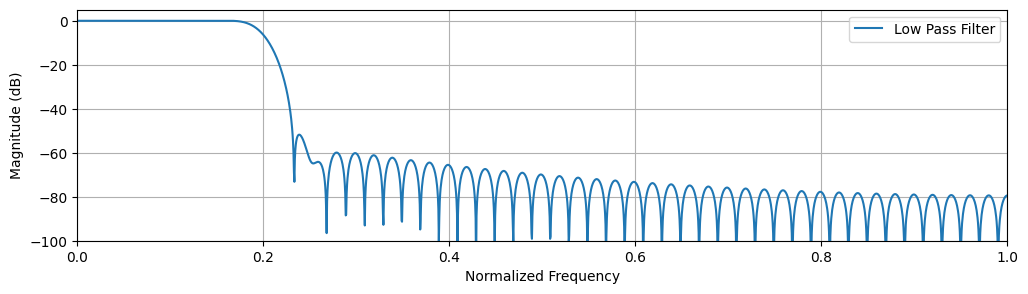

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.xlim(0,1)
plt.ylim(-100,5)
plt.grid(True)

plt.plot(nf, lpf_fft_db, label="Low Pass Filter")
plt.legend()
plt.show()


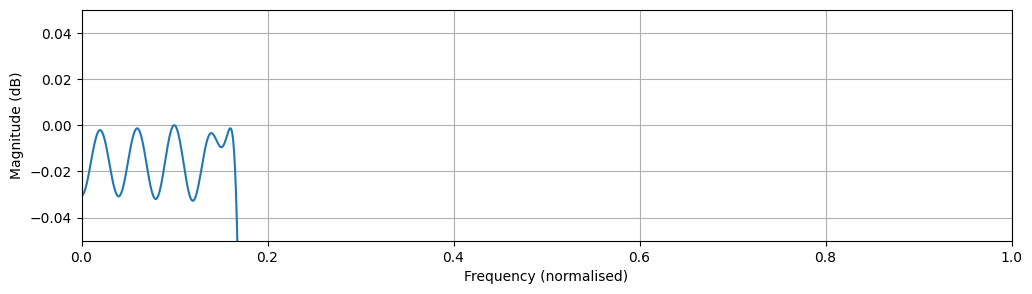

In [8]:
plt.figure(figsize=(12,3))
plt.xlabel('Frequency (normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
plt.ylim(-0.05,0.05)
plt.grid(True)

plt.plot(nf, lpf_fft_db)
plt.show()


In [9]:
lpf_phase = np.unwrap(np.angle(lpf_fft))

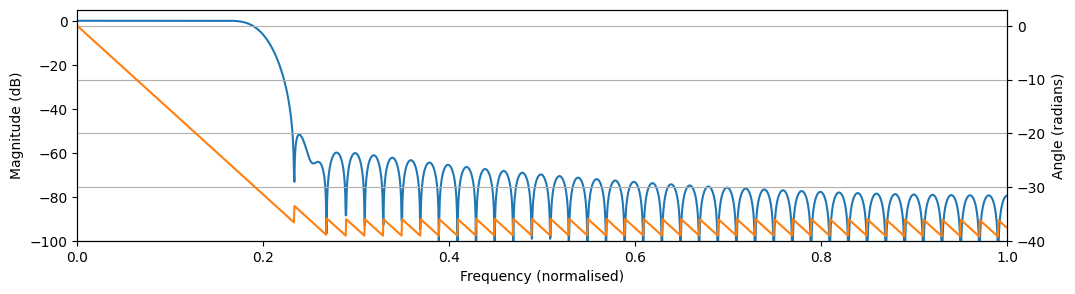

In [10]:
plt.figure(figsize=(12,3))

plt.xlabel('Frequency (normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
plt.ylim(-100,5)
plt.plot(nf, lpf_fft_db)

plt.twinx()
plt.ylabel("Angle (radians)")
plt.axis('tight')
plt.xlim(0,1)
plt.ylim(np.floor(min(lpf_phase[0:int(len(lpf_phase)/2)])) ,3)
plt.plot(nf, lpf_phase, color='tab:orange')
plt.grid(True)


### 2. Filter Design

#### 2.1 Window method

In [11]:

w_hamming = np.hamming(N)
w_hann = np.hanning(N)
w_blackman = np.blackman(N)
w_bartlett = np.bartlett(N)

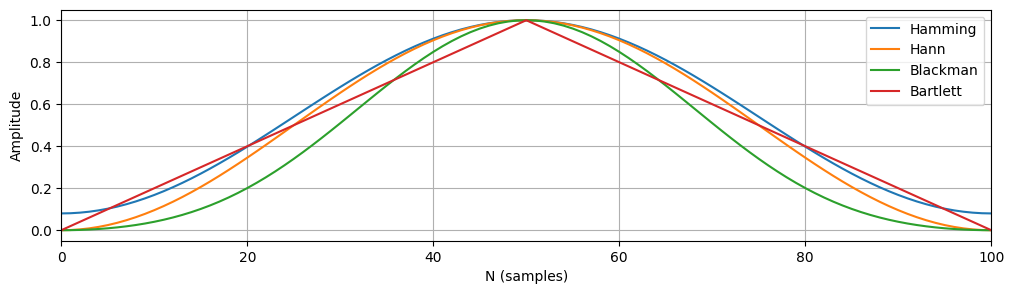

In [12]:
plt.figure(figsize=(12,3))
plt.plot(w_hamming, label="Hamming")
plt.plot(w_hann, label="Hann")
plt.plot(w_blackman, label="Blackman")
plt.plot(w_bartlett, label="Bartlett")
plt.xlim(0,101-1)
plt.xlabel("N (samples)")
plt.ylabel("Amplitude")

plt.legend()
plt.grid(True)
plt.show()

In [13]:
n = np.arange(-(N-1)/2,(N-1)/2+1)
fc = 0.3 # normalised cutoff frequency (% of Nyquist)
hd_n = np.sinc(fc*n)

h_n = hd_n * w_hamming

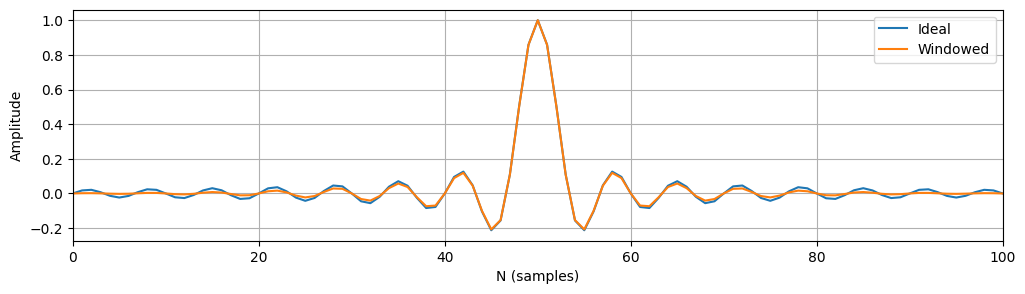

In [14]:
plt.figure(figsize=(12,3))
plt.plot(hd_n, label="Ideal")
plt.plot(h_n, label="Windowed")
plt.grid(True)
plt.xlim(0,len(h_n)-1)
plt.ylabel("Amplitude")
plt.xlabel("N (samples)")
plt.legend()
plt.show()


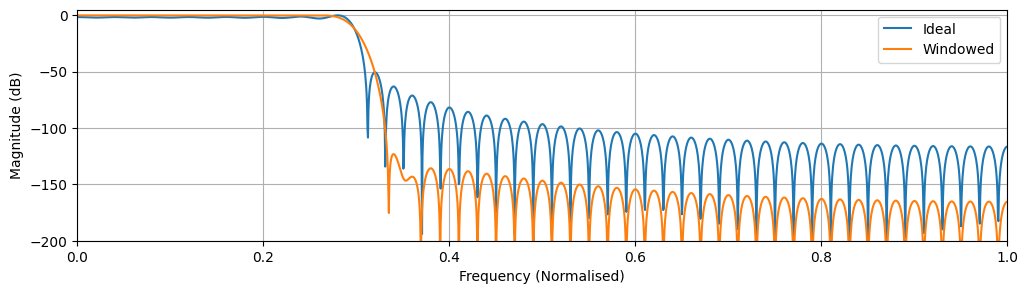

In [15]:
hd_n_fft = 20*np.log(abs(get_normalized_fft(hd_n, NFFT))) # get the magnitude in dB
h_n_fft = 20*np.log(abs(get_normalized_fft(h_n, NFFT)))

nf_norm = np.linspace(0,2,NFFT)

plt.figure(figsize=(12,3))
plt.xlabel('Frequency (Normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
plt.ylim(-200,5)
plt.grid(True)

plt.plot(nf_norm, hd_n_fft, label="Ideal")
plt.plot(nf_norm, h_n_fft, label="Windowed")

plt.legend()
plt.show()

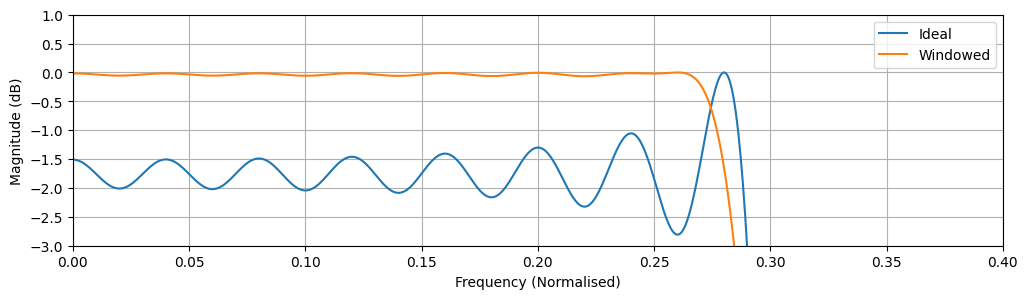

In [16]:
plt.figure(figsize=(12,3))
plt.xlabel('Frequency (Normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,0.4)
plt.ylim(-3,1)
plt.grid(True)

plt.plot(nf_norm, hd_n_fft, label="Ideal")
plt.plot(nf_norm, h_n_fft, label="Windowed")

plt.legend()
plt.show()

In [17]:
freq = [0, 0.4, 0.4, 0.6, 0.6, 1]
gain = [1, 1, 0, 0, 1, 1]
N = 101

h_wm = signal.firwin2(N, freq, gain, window='blackman')

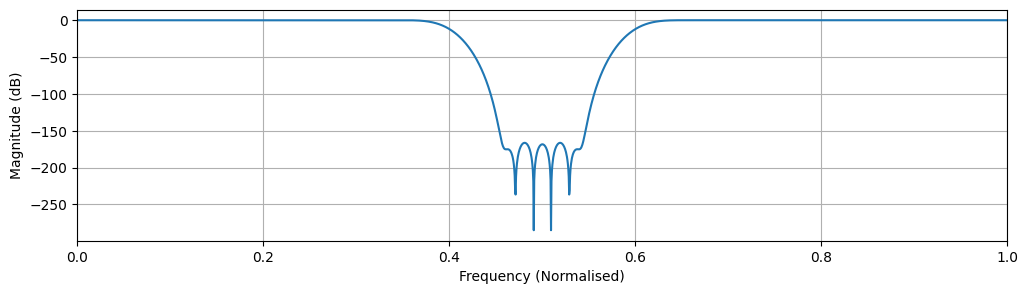

In [18]:
h_wm_fft = 20*np.log(abs(get_normalized_fft(h_wm, NFFT)))

nf_norm = np.linspace(0,2,NFFT)

plt.figure(figsize=(12,3))
plt.xlabel('Frequency (Normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
# plt.ylim(-300,5)
plt.grid(True)

plt.plot(nf_norm, h_wm_fft)

plt.show()


#### 2.2 Parks-McClellan Algorithm
The Parks-McClellan algorithm uses the Remez Exchange algorithm and Chebyshev Approximation to design an optimal filter that minimises the error between the desired (ideal) response and the actual (achievable) response.

In [19]:
N = 101
tb = 0.01   # transition bandwidth (%)
freq = [0, 0.2-tb, 0.2, 0.3, 0.3+tb, 0.5]
gain = [1, 0, 1]
h_pm = signal.remez(N, freq, gain)

The inputs to ```remez``` are very similar to ```firwin2``` with some subtle differences.

1. The list of frequencies given are in sample rate, not nyquist rate.
2. The list of gains should be half the length of frequencies.
3. The transmission bandwidth is passed in the list of frequencies so that filter algorithm will have more opportunity to converge.

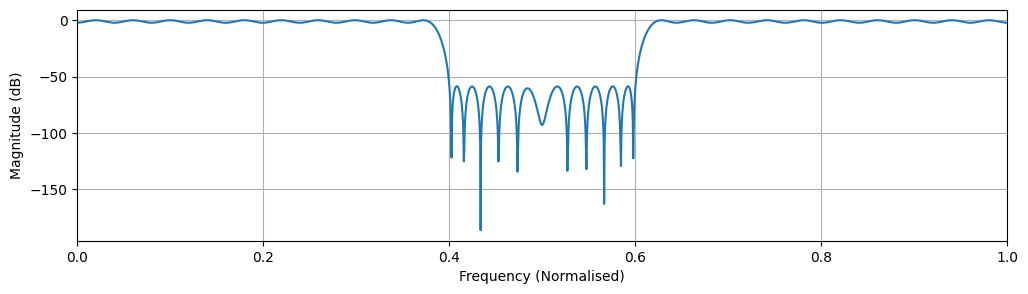

In [20]:
h_pm_fft = 20*np.log(abs(get_normalized_fft(h_pm, NFFT)))

nf_norm = np.linspace(0,2,NFFT)

plt.figure(figsize=(12,3))
plt.xlabel('Frequency (Normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
# plt.ylim(-100,5)
plt.grid(True)

plt.plot(nf_norm, h_pm_fft)

plt.show()

### 2.3 Least Square Method


In [21]:
tb = 0.01 # transition bandwidth (%)
freq = [0, 0.40-tb, 0.4, 0.60, 0.60+tb, 1]
gain = [1, 1, 0, 0, 1, 1]
N = 101

h_ls = signal.firls(N, freq, gain)


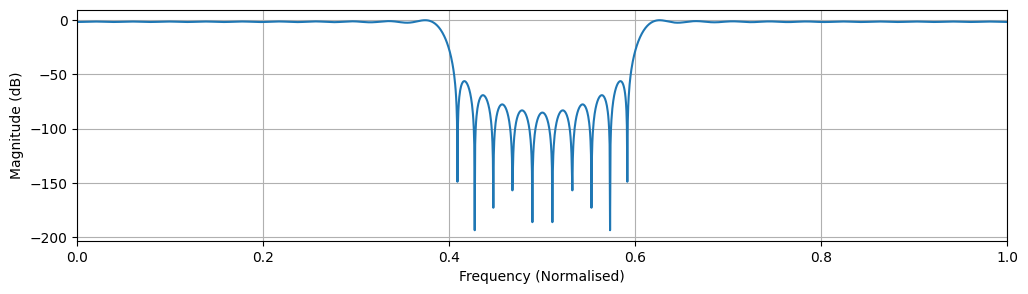

In [23]:
h_ls_fft = 20*np.log(abs(get_normalized_fft(h_ls, NFFT)))

nf_norm = np.linspace(0,2,NFFT)

plt.figure(figsize=(12,3))
plt.xlabel('Frequency (Normalised)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0,1)
plt.grid(True)

plt.plot(nf_norm, h_ls_fft)

plt.show()
